In [25]:
import numpy as np 

np.random.seed(1)

# randomly generate data 
N = 2 # number of training sample 
d = 2 # data dimension 
C = 3 # number of classes 
eta = 0.5

In [26]:
from scipy import sparse 
def convert_labels(y, C = C):
    """
    convert 1d label to a matrix label one-host
    """
    Y = sparse.coo_matrix((np.ones_like(y), 
        (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y 

In [27]:
def softmax(Z):
    e_Z = np.exp(Z)
    A = e_Z / e_Z.sum(axis = 0)
    return A

# loss function  
def loss(X, Y, W):
    A = softmax(W.T.dot(X))
    return -np.sum(Y*np.log(A))

In [28]:
def softmax_regression(X, y, W_init, eta, tol = 1e-4, max_count = 10000):
    W = [W_init]    
    C = W_init.shape[1]
    Y = convert_labels(y, C)
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    
    count = 0
    check_w_after = 20
    while count < max_count:
        # mix data 
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = Y[:, i].reshape(C, 1)
            ai = softmax(np.dot(W[-1].T, xi))
            W_new = W[-1] + eta*xi.dot((yi - ai).T)
            count += 1
            # stopping criteria
            if count%check_w_after == 0:                
                if np.linalg.norm(W_new - W[-check_w_after]) < tol:
                    return W
            W.append(W_new)
    return W

In [29]:
def pred(W, X):
    A = softmax(W.T.dot(X))
    return np.argmax(A, axis = 0)

In [30]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0).T
X = np.concatenate((np.ones((1, 3*N)), X), axis = 0)
C = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

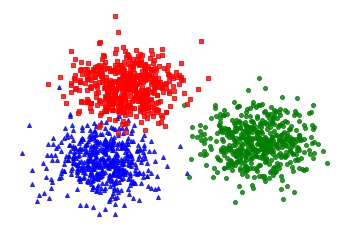

In [31]:
import matplotlib.pyplot as plt
def display(X, label):
    X0 = X[:, label == 0]
    X1 = X[:, label == 1]
    X2 = X[:, label == 2]
    
    plt.plot(X0[0, :], X0[1, :], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[0, :], X1[1, :], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[0, :], X2[1, :], 'rs', markersize = 4, alpha = .8)

    plt.axis('off')
    plt.plot()
    plt.show()
    
display(X[1:, :], original_label)

In [32]:
W_init = np.random.randn(X.shape[0], C)
W = softmax_regression(X, original_label, W_init, eta)
print(W[-1])

[[ 28.81133157 -13.17155514 -14.52286219]
 [ -1.97937413   7.48175817  -3.90910109]
 [ -4.23006644  -5.00023076   9.33748904]]
